# DADA2 pipeline for Hyphosphere Exp 11

* Need to define for each dataset
** Number of cores
** OutFolder
** Path to sequence directory

In [1]:
ncores = 20

In [2]:
library(dada2)
library(tidyr)
library(dplyr)

Loading required package: Rcpp

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
seqDIR = '~/Hyphosphere/data/MiSeq/20181126/demult/'
path = seqDIR

#location of taxonomy database
TrainingSet = '~/databases/silva_nr_v132_train_set.fa.gz'
SpeciesTraining = '~/databases/silva_species_assignment_v132.fa.gz'

# Sample data table
SamTab = '~/Hyphosphere/Exp10/Exp10Metadata.txt'

# output folder
OutFolder = '~/Hyphosphere/data/Exp10/DADA2Files'


# Filter and trim


In [4]:
#Collect forward and reverse names in order
fastqFs <- sort(list.files(path, pattern=".R1.fq.gz"))
fastqRs <- sort(list.files(path, pattern=".R2.fq.gz"))
if(length(fastqFs) != length(fastqRs)) stop("Forward and reverse files do not match.")

## Plot quality profiles of forward and reverse reads

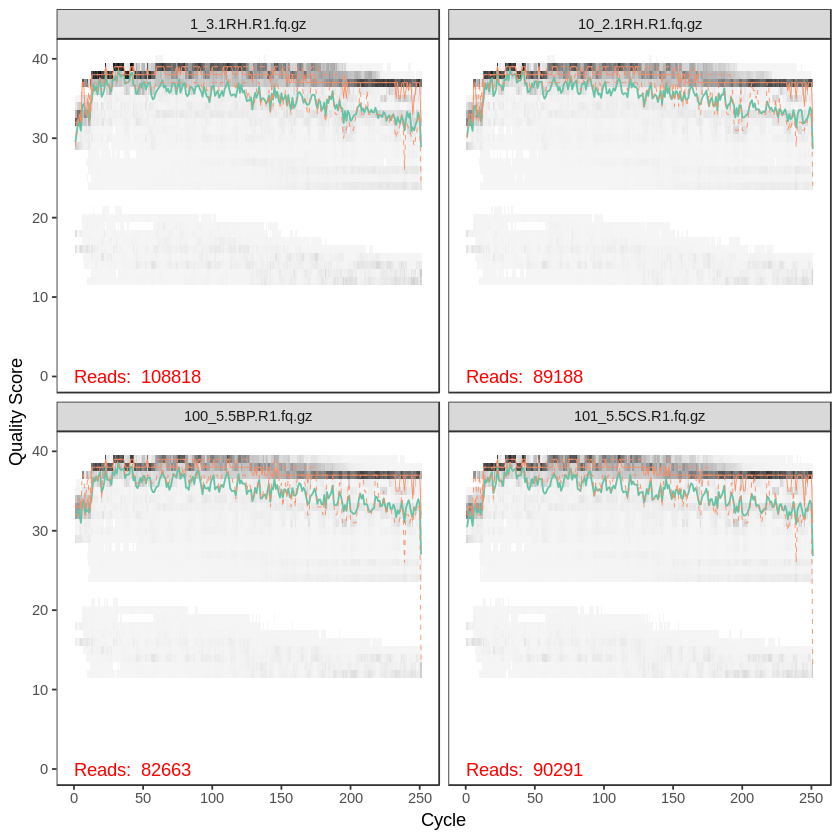

In [5]:
plotQualityProfile(file.path(path,fastqFs[1:4]))


* Foward reads look good.  Truncate to 180

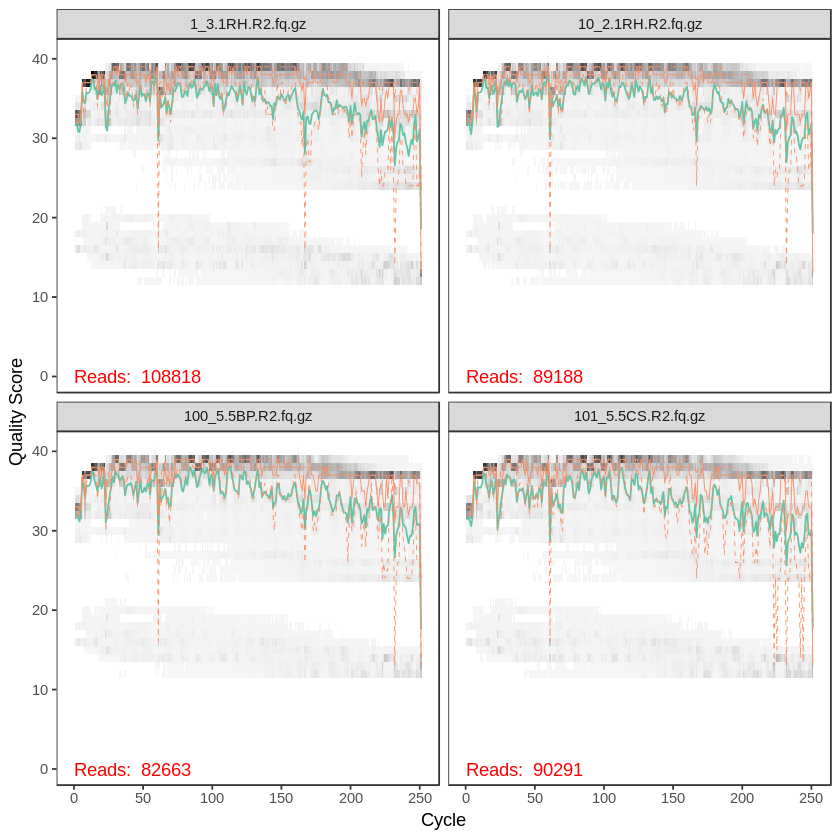

In [6]:
plotQualityProfile(file.path(path,fastqRs[1:4]))

* Reverse reads are pretty good except spike in low quality sequences around cycle 60, truncate to 130 to be conservative

# Perform filtering and trimming


In [7]:
filtpathF <- file.path(path, "filtered_F") # Filtered forward files go into the pathF/filtered/ subdirectory
filtpathR <- file.path(path, "filtered_R") # ...

* Sequencing primers contain amplicon primer so no trimLeft is necessary

In [8]:
# Filtering: THESE PARAMETERS ARENT OPTIMAL FOR ALL DATASETS
out = filterAndTrim(fwd=file.path(path, fastqFs), filt=file.path(filtpathF, fastqFs),
              rev=file.path(path, fastqRs), filt.rev=file.path(filtpathR, fastqRs),
              truncLen=c(180,130), maxEE=2, truncQ=2, maxN=0, rm.phix=TRUE,
              compress=TRUE, verbose=TRUE, multithread=ncores)

Creating output directory: /home/be68/Hyphosphere/data/MiSeq/20181126/demult//filtered_F
Creating output directory:/home/be68/Hyphosphere/data/MiSeq/20181126/demult//filtered_R


In [9]:
head(out)

,reads.in,reads.out
1_3.1RH.R1.fq.gz,108818,103426
10_2.1RH.R1.fq.gz,89188,85913
100_5.5BP.R1.fq.gz,82663,78206
101_5.5CS.R1.fq.gz,90291,84808
102_5.5BS.R1.fq.gz,104470,98937
103_6.5BP.R1.fq.gz,130629,125529


In [10]:
filtFs <- list.files(filtpathF, pattern=".fq.gz", full.names = TRUE)
filtRs <- list.files(filtpathR, pattern=".fq.gz", full.names = TRUE)
sample.names <- sapply(strsplit(basename(filtFs), ".R1.fq.gz"), `[`, 1) # Assumes filename = samplename_XXX.fastq.gz
sample.namesR <- sapply(strsplit(basename(filtRs), ".R2.fq.gz"), `[`, 1) # Assumes filename = samplename_XXX.fastq.gz
if(!identical(sample.names, sample.namesR)) stop("Forward and reverse files do not match.")
names(filtFs) <- sample.names
names(filtRs) <- sample.names
sample.names

[1] "1_3.1RH"             "10_2.1RH"            "100_5.5BP"          
  [4] "101_5.5CS"           "102_5.5BS"           "103_6.5BP"          
  [7] "104_6.5CS"           "105_6.5BS"           "106_6.1BP"          
 [10] "107_5.1BP"           "108_6.1RT"           "109_5.1RT"          
 [13] "11_1.1CS"            "110_4.1RT"           "111_4.2BP"          
 [16] "112_4.2BS"           "113_4.2CS"           "114_3.2CS"          
 [19] "115_5.2BS"           "116_5.2BP"           "117_6.2BP"          
 [22] "118_6.2BS"           "119_4.3BP"           "12_3.1CS"           
 [25] "120_6.2CS"           "121_4.3BS"           "122_4.3CS"          
 [28] "123_5.3BP"           "124_5.3BS"           "125_5.3CS"          
 [31] "126_6.3BP"           "127_6.3BS"           "128_6.3CS"          
 [34] "129_5.2RT"           "13_1.2RH"            "130_4.3RT"          
 [37] "131_5.3RT"           "132_6.3RT"           "133_4.2RT"          
 [40] "134_6.2RT"           "135_4.4RT"           "136_5.4RT"          
 [43] "137_6.4RT"           "138_4.4BP"           "139_4.4CS"          
 [46] "14_1.2CH"            "140_4.4BS"           "141_5.4BS"          
 [49] "142_5.4BP"           "143_5.4CS"           "144_6.4BP"          
 [52] "145_6.4CS"           "146_6.4BS"           "147_T0R1"           
 [55] "148_T0R2"            "149_T0R3"            "15_1.2BP"           
 [58] "150_T0R4"            "151_ExtractionBlank" "152_GvSpores"       
 [61] "153_T0R5"            "154_T0R6"            "155_1.3RH"          
 [64] "156_2.3RH"           "157_3.3RH"           "158_1.4RH"          
 [67] "159_2.4RH"           "16_2.2RH"            "160_Unknown"        
 [70] "161_4.1CH"           "162_4.1RH"           "163_4.4CH"          
 [73] "164_4.4RH"           "165_5.1CH"           "166_5.1RH"          
 [76] "167_5.4CH"           "168_5.4RH"           "169_6.1CH"          
 [79] "17_2.2CH"            "170_6.1RH"           "171_6.4CH"          
 [82] "172_6.4RH"           "173_4.2CH"           "174_4.2RH"          
 [85] "175_4.5CH"           "176_4.5RH"           "177_5.2CH"          
 [88] "178_5.2RH"           "179_5.5CH"           "18_2.2BP"           
 [91] "180_5.5RH"           "181_6.2CH"           "182_6.2RH"          
 [94] "183_6.5CH"           "184_6.5RH"           "185_4.3CH"          
 [97] "186_4.3RH"           "187_5.3CH"           "188_5.3RH"          
[100] "189_6.3CH"           "19_3.2RH"            "190_6.3RH"          
[103] "191_Mock-2"          "192_ExtractionBlank" "2_3.1BP"            
[106] "20_3.2CH"            "21_3.2BP"            "22_1.3RH"           
[109] "23_1.3CH"            "24_1.3BP"            "25_2.3CH"           
[112] "26_2.3CH"            "27_2.3RH"            "28_2.3BP"           
[115] "29_3.3CH"            "3_2.1CH"             "30_3.3RH"           
[118] "31_3.3BP"            "32_1.4CH"            "33_1.4RH"           
[121] "34_1.4BP"            "35_2.4CH"            "36_2.4RH"           
[124] "37_2.4BP"            "38_3.4CH"            "39_3.4RH"           
[127] "4_2.1BP"             "40_3.4BP"            "41_1.5CH"           
[130] "42_1.5BP"            "43_2.5CH"            "44_2.5RH"           
[133] "45_2.5BP"            "46_3.5CH"            "47_3.5RH"           
[136] "48_3.5BP"            "49_3.5BS"            "5_1.1RH"            
[139] "50_2.5BS"            "51_1.5BS"            "52_2.5CS"           
[142] "53_1.3BS"            "54_1.3BS"            "55_2.3BS"           
[145] "56_3.3BS"            "57_1.3CS"            "58_2.3CS"           
[148] "59_3.3CS"            "6_3.1CH"             "60_2.4BS"           
[151] "61_2.4CS"            "62_1.5CS"            "63_1.4BS"           
[154] "64_1.4CS"            "65_3.4CS"            "66_4.1BP"           
[157] "67_4.1BS"            "68_5.1BS"            "69_6.1BS"           
[160] "7_2.1CS"             "70_4.1CS"            "71_6.1CS"           
[163] "72_5.1CS"            "73_1.3RT"            "74_2.3RT"           
[166] "75_3.3RT"            "76_1.4RT"    

## Learn errors

In [11]:
set.seed(100)
# Learn forward error rates
errF <- learnErrors(filtFs, multithread=ncores)
# Learn reverse error rates
errR <- learnErrors(filtRs, multithread=ncores)

103827420 total bases in 576819 reads from 6 samples will be used for learning the error rates.
103315940 total bases in 794738 reads from 8 samples will be used for learning the error rates.


Warning message:
“Transformation introduced infinite values in continuous y-axis”

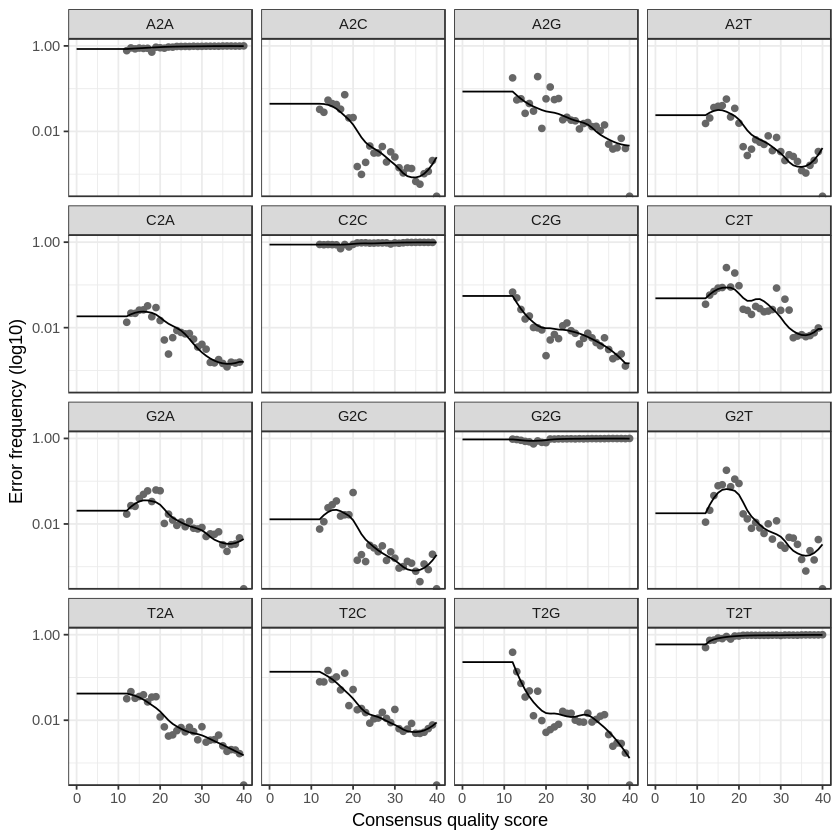

In [12]:
plotErrors(errF)

## Sequence inference

In [ ]:
# Sample inference and merger of paired-end reads
mergers <- vector("list", length(sample.names))
names(mergers) <- sample.names
for(sam in sample.names) {
  cat("Processing:", sam, "\n")
    derepF <- derepFastq(filtFs[[sam]])
    ddF <- dada(derepF, err=errF, multithread=ncores)
    derepR <- derepFastq(filtRs[[sam]])
    ddR <- dada(derepR, err=errR, multithread=ncores)
    merger <- mergePairs(ddF, derepF, ddR, derepR)
    mergers[[sam]] <- merger
}
rm(derepF); rm(derepR)

# Construct sequence table and remove chimeras

In [18]:

seqtab <- makeSequenceTable(mergers)

In [19]:
outFile = file.path(OutFolder,"seqtab.rds")
saveRDS(seqtab, outFile) 

In [20]:
dim(seqtab)
# Inspect distribution of sequence lengths
table(nchar(getSequences(seqtab)))

[1]   192 47018


  180   181   190   191   197   199   200   201   202   203   204   205   206 
   14     1    10     1     1     2     1     2     2     5     2     3     6 
  209   210   213   215   218   219   220   221   222   223   224   225   226 
   17     1     1     4     4     1    10    31    12    21    14     1     4 
  227   228   229   230   231   232   233   234   235   236   237   238   239 
   15     8     2     3     5     4     6     2     3     1     3     1     1 
  240   241   243   244   245   246   247   248   249   250   251   252   253 
    3     3     2     2     2     4     6    10    18    18   167   548 40366 
  254   255   256   257   258   259   260   261   262   263   264   265   266 
 3229   311   407   234    27    16    16     8     9    10     8    15     7 
  267   268   269   270   271   272   273   274   275   276   278   279   280 
    3     2    31    31   515   423   265    19     3     2     2     1     1 
  281   282   283   284   286   287   288   289   2

## subset to proper sequence lengths

In [21]:
seqtab2 <- seqtab[,nchar(colnames(seqtab)) %in% seq(251,257)]

table(nchar(getSequences(seqtab2)))


  251   252   253   254   255   256   257 
  167   548 40366  3229   311   407   234 

## Remove chimeras

* removes all sequences that can be exactly reconstructed as a bimera of two more abundant sequences

In [22]:
seqtab.nochim <- removeBimeraDenovo(seqtab2, method="consensus", multithread=ncores, verbose=TRUE)

Identified 11960 bimeras out of 45262 input sequences.


In [23]:
dim(seqtab.nochim)

[1]   192 33302

In [24]:
outFile = file.path(OutFolder,"seqtab-nochim.rds")

saveRDS(seqtab.nochim, outFile)

# Checkpoint read seqtab.nochim

In [25]:
CheckPoint = file.path(OutFolder,"seqtab-nochim.rds")

seqtab.nochim = readRDS(CheckPoint)

In [26]:
paste("Fraction of reads not attributed to chimeras:", sum(seqtab.nochim)/sum(seqtab))

[1] "Fraction of reads not attributed to chimeras: 0.953418433006482"

# Track reads through the pipeline

In [27]:
 #Track
  getN <- function(x) sum(getUniques(x))
  track <- cbind(out, rowSums(seqtab),rowSums(seqtab.nochim))
  # If processing a single sample, remove the sapply calls: e.g. replace sapply(dadaFs, getN) with getN(dadaFs)
  dim(track)
  colnames(track) <- c("input", "filtered", "seqtable", "nonchim")
  rownames(track) <- sample.names
  tail(track)

[1] 192   4

,input,filtered,seqtable,nonchim
94_ExtractionBlank,5302,4617,4354,2792
95_Mock,65317,63106,58994,48069
96_ExtractionBlank,16154,15037,14533,13103
97_4.5BP,88702,84096,57659,55980
98_4.5CS,88292,83513,60477,58762
99_4.5BS,70334,66273,39909,38520


In [28]:
track %>% as.data.frame() %>% mutate(sample = row.names(.)) %>% dplyr::arrange(desc(nonchim))

input,filtered,seqtable,nonchim,sample
141070,135601,130605,127276,189_6.3CH
124941,119659,105955,104017,3_2.1CH
117577,112656,103962,101883,6_3.1CH
108818,103426,100582,97872,1_3.1RH
106264,103203,99502,97782,184_6.5RH
108505,103155,99253,96823,25_2.3CH
99073,95510,92911,90023,27_2.3RH
130629,125529,89890,87042,103_6.5BP
89590,86809,83981,82511,36_2.4RH
92613,89059,83533,81425,16_2.2RH


In [29]:
outFile = file.path(OutFolder,'Tracking.txt')
write.table(track, file = outFile, sep = "\t")

# Assign taxonomy

* hold off here and wait for processing and merging of other experiments so that one master ASV and taxa table can be created